In [ ]:
import numpy as np
import pandas as pd
import io

import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

In [ ]:
#importing the dataframe and making copy to manipulate.
df = pd.read_csv('insurance.csv')
df_copy = df.copy()

# Display the first few rows
print(df.head())
print(df.info())
print(df.describe(include='all'))
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
                age   sex          bmi     children smoker     region  \
count   1338.00000

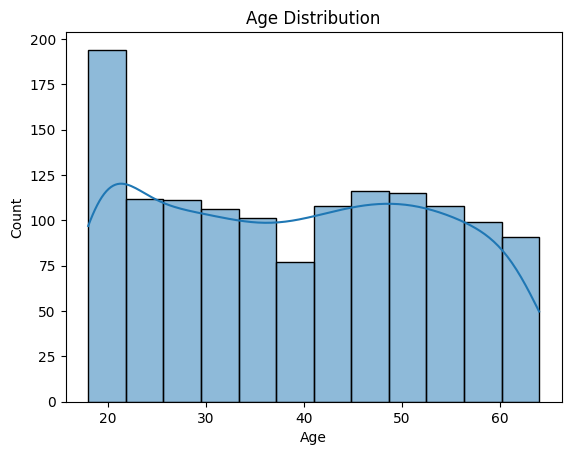

In [ ]:
#by age distrobution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- The dataset is not perfectly uniform there is a spike in the younger ages, then a decline and slight rise toward older ages.
- It could imply that more young people are buying insurance, or that they’re overrepresented in this sample.
- If age is a factor in predicting costs, this shape matters a lot—it could skew average charges, influence regression modeling, or affect insights like risk by age


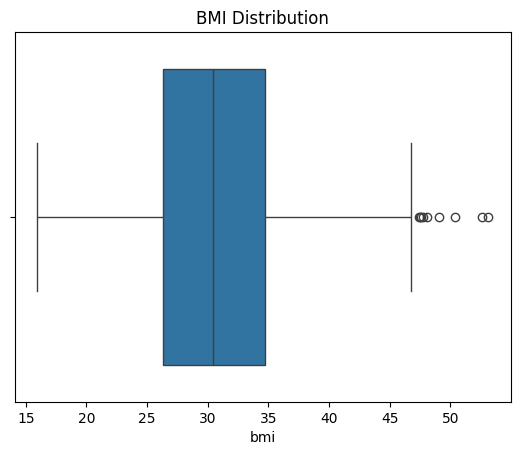

In [ ]:
#bmi boxplot
sns.boxplot(x=df['bmi'])
plt.title('BMI Distribution')
plt.show()

- Most BMIs hover around the middle range—somewhere between the mid-20s to low-30s.
- There are several individuals with BMI above 40 or even 50, which are flagged as outliers. That could suggest obesity-related trends in insurance costs.



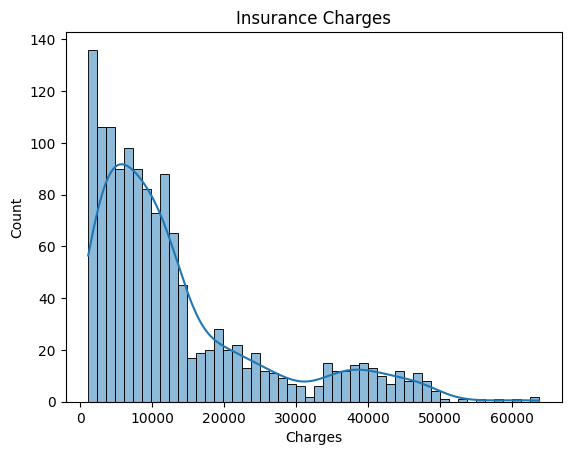

In [ ]:
# Charges histogram
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

- Most insurance charges fall between 0 and 20,000 dollars, with the highest concentration in the 0 to 10,000 dollar bracket.
- Beyond 20,000 dollars, the number of individuals gradually decreases—but there are still people paying significantly more, even reaching close to 60,000 dollars.
- The smooth curve (KDE line) helps visualize the shape of the distribution. It confirms that the data is right-skewed—meaning a smaller group pays much higher premiums compared to the majority.



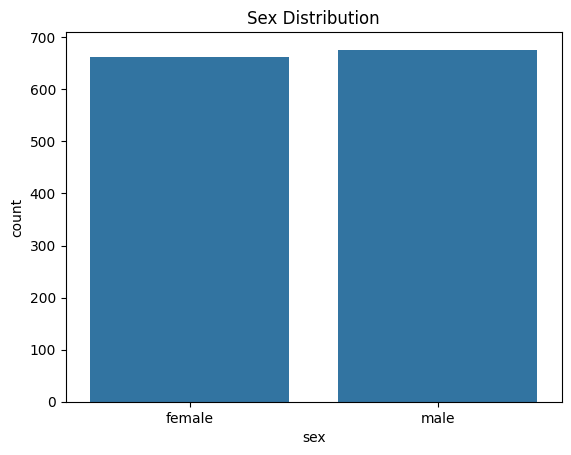

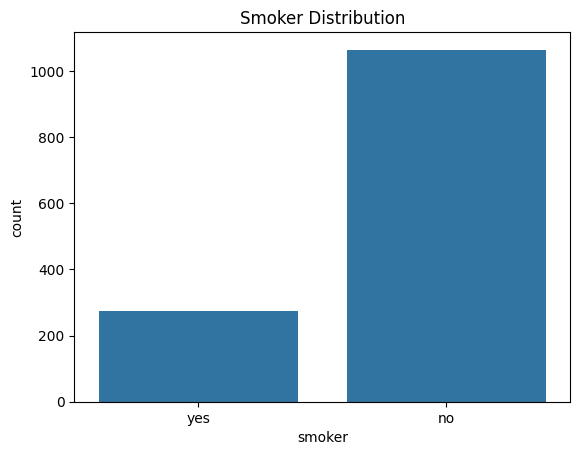

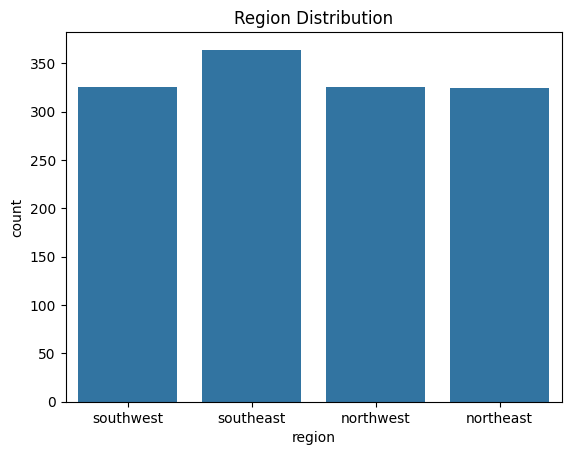

In [ ]:
# Categorical count plots
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.show()

sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

- Your dataset doesn’t lean toward one sex over the other, which is great for reducing gender bias in analysis and modeling.
- About 75–80% of this dataset consists of non-smokers, while only ~20–25% are smokers.
- That imbalance is critical for analysis because smoking is often linked to higher insurance charges.
- This uneven split means smoking status could have strong predictive power.
- Southeast has the highest count—just over 350 people.
- Southwest follows closely with slightly more than 300.
- Northwest and Northeast each have just under 300 individuals.



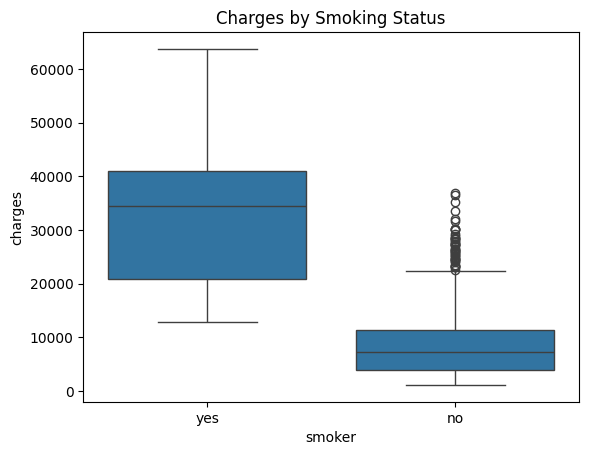

In [ ]:
# 2 feature comparisons.
# Charges vs smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.show()